# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
weather_api_key

'86f0efff52c6d74d2548a106c6dde909'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [5]:
cities

['yeppoon',
 'mys shmidta',
 'victoria',
 'saint-georges',
 'asilah',
 'hasaki',
 'busselton',
 'rikitea',
 'pandan',
 'soyo',
 'airai',
 'umzimvubu',
 'lucapa',
 'thompson',
 'vaini',
 'tiksi',
 'port elizabeth',
 'ushuaia',
 'illoqqortoormiut',
 'buchanan',
 'barmer',
 'jamestown',
 'hermanus',
 'ancud',
 'nizhneyansk',
 'lompoc',
 'saint-philippe',
 'naze',
 'ketchikan',
 'mataura',
 'attawapiskat',
 'guerrero negro',
 'upernavik',
 'faanui',
 'cabo san lucas',
 'qaanaaq',
 'atuona',
 'cape town',
 'swan hill',
 'bluff',
 'butaritari',
 'bethel',
 'kokopo',
 'tuktoyaktuk',
 'port moresby',
 'yellandu',
 'boshnyakovo',
 'albany',
 'qasigiannguit',
 'new norfolk',
 'avarua',
 'hilo',
 'klaksvik',
 'longyearbyen',
 'ponta do sol',
 'esperance',
 'kozlovo',
 'gardez',
 'nhulunbuy',
 'kapaa',
 'belushya guba',
 'barrow',
 'sao filipe',
 'kaitangata',
 'tsihombe',
 'saint george',
 'atbasar',
 'ihosy',
 'blackfoot',
 'grindavik',
 'arraial do cabo',
 'zyryanka',
 'geraldton',
 'vostok',
 

In [6]:
cities_random = random.sample(list(cities),10)
cities_random

['sinop',
 'shimoda',
 'srivardhan',
 'soe',
 'lubao',
 'port jervis',
 'hihifo',
 'morozovsk',
 'caruray',
 'georgetown']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
sunrise = []
sunset = []
temp = []
lat = []
lng = []
wind = []



In [8]:
weather_data = []


In [10]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
print('Beginning Data Retrieval')
print('------------------------')
#query_url = (f"{url}q={city}&appid={api_key}")
for city in cities:
    query_url = (f"{url}q={city}&units={units}&appid={weather_api_key}")
    
    # Get weather data
    response = requests.get(query_url).json()
   
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(query_url)
    
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        sunrise.append(response['sys']['sunrise'])
        sunset.append(response['sys']['sunset'])
        new_cities.append(city)

    except:
        print("City not found...Skipping")
        pass

print('-------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | yeppoon
http://api.openweathermap.org/data/2.5/weather?q=yeppoon&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 2 of set 0 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
City not found...Skipping
Processing record 3 of set 0 | victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 4 of set 0 | saint-georges
http://api.openweathermap.org/data/2.5/weather?q=saint-georges&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 5 of set 0 | asilah
http://api.openweathermap.org/data/2.5/weather?q=asilah&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 6 of set 0 | hasaki
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Proces

Processing record 3 of set 1 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 4 of set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 5 of set 1 | esperance
http://api.openweathermap.org/data/2.5/weather?q=esperance&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 6 of set 1 | kozlovo
http://api.openweathermap.org/data/2.5/weather?q=kozlovo&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 7 of set 1 | gardez
http://api.openweathermap.org/data/2.5/weather?q=gardez&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 8 of set 1 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?q=nhulunbuy&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 9 of set 1 | kapaa
http://api.openweathermap.org/data/2.

Processing record 5 of set 2 | ostersund
http://api.openweathermap.org/data/2.5/weather?q=ostersund&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 6 of set 2 | apastovo
http://api.openweathermap.org/data/2.5/weather?q=apastovo&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 7 of set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 8 of set 2 | korla
http://api.openweathermap.org/data/2.5/weather?q=korla&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 9 of set 2 | saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 10 of set 2 | bloomingdale
http://api.openweathermap.org/data/2.5/weather?q=bloomingdale&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 11 of set 2 | pevek
http://api.openweathermap.org/data/2.5/we

Processing record 7 of set 3 | zelenoborsk
http://api.openweathermap.org/data/2.5/weather?q=zelenoborsk&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 8 of set 3 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 9 of set 3 | mackay
http://api.openweathermap.org/data/2.5/weather?q=mackay&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 10 of set 3 | waw
http://api.openweathermap.org/data/2.5/weather?q=waw&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 11 of set 3 | taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 12 of set 3 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 13 of set 3 | poso
http://api.openweathermap.org/data/2.5/weather?q=p

Processing record 9 of set 4 | coetupo
http://api.openweathermap.org/data/2.5/weather?q=coetupo&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
City not found...Skipping
Processing record 10 of set 4 | egvekinot
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 11 of set 4 | placerville
http://api.openweathermap.org/data/2.5/weather?q=placerville&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 12 of set 4 | constitucion
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 13 of set 4 | sumoto
http://api.openweathermap.org/data/2.5/weather?q=sumoto&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 14 of set 4 | neuquen
http://api.openweathermap.org/data/2.5/weather?q=neuquen&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 15 of set 4 | vestmanna
http://

Processing record 11 of set 5 | matagami
http://api.openweathermap.org/data/2.5/weather?q=matagami&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 12 of set 5 | malysheva
http://api.openweathermap.org/data/2.5/weather?q=malysheva&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 13 of set 5 | narsaq
http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 14 of set 5 | kirakira
http://api.openweathermap.org/data/2.5/weather?q=kirakira&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 15 of set 5 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar del plata&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 16 of set 5 | carballo
http://api.openweathermap.org/data/2.5/weather?q=carballo&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 17 of set 5 | yaan
http://api.openweathermap.org/data/2.

Processing record 13 of set 6 | yar-sale
http://api.openweathermap.org/data/2.5/weather?q=yar-sale&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 14 of set 6 | sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?q=sao paulo de olivenca&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 15 of set 6 | ovre ardal
http://api.openweathermap.org/data/2.5/weather?q=ovre ardal&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 16 of set 6 | basco
http://api.openweathermap.org/data/2.5/weather?q=basco&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 17 of set 6 | pacific grove
http://api.openweathermap.org/data/2.5/weather?q=pacific grove&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 18 of set 6 | nome
http://api.openweathermap.org/data/2.5/weather?q=nome&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 19 of set 6 | maraa
http://api.openwea

Processing record 15 of set 7 | mahebourg
http://api.openweathermap.org/data/2.5/weather?q=mahebourg&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 16 of set 7 | portree
http://api.openweathermap.org/data/2.5/weather?q=portree&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 17 of set 7 | izmir
http://api.openweathermap.org/data/2.5/weather?q=izmir&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 18 of set 7 | gandu
http://api.openweathermap.org/data/2.5/weather?q=gandu&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 19 of set 7 | auki
http://api.openweathermap.org/data/2.5/weather?q=auki&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 20 of set 7 | opunake
http://api.openweathermap.org/data/2.5/weather?q=opunake&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 21 of set 7 | cayenne
http://api.openweathermap.org/data/2.5/weather?q=cayenne&units=I

Processing record 18 of set 8 | kota belud
http://api.openweathermap.org/data/2.5/weather?q=kota belud&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 19 of set 8 | port blair
http://api.openweathermap.org/data/2.5/weather?q=port blair&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 20 of set 8 | lae
http://api.openweathermap.org/data/2.5/weather?q=lae&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 21 of set 8 | chapais
http://api.openweathermap.org/data/2.5/weather?q=chapais&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 22 of set 8 | visby
http://api.openweathermap.org/data/2.5/weather?q=visby&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 23 of set 8 | benghazi
http://api.openweathermap.org/data/2.5/weather?q=benghazi&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 24 of set 8 | gaomi
http://api.openweathermap.org/data/2.5/weather?q=gaomi

Processing record 22 of set 9 | barbacoas
http://api.openweathermap.org/data/2.5/weather?q=barbacoas&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 23 of set 9 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 24 of set 9 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 25 of set 9 | astoria
http://api.openweathermap.org/data/2.5/weather?q=astoria&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 26 of set 9 | zacualtipan
http://api.openweathermap.org/data/2.5/weather?q=zacualtipan&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 27 of set 9 | sabang
http://api.openweathermap.org/data/2.5/weather?q=sabang&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 28 of set 9 | unai
http:

Processing record 24 of set 10 | mayya
http://api.openweathermap.org/data/2.5/weather?q=mayya&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 25 of set 10 | sinkat
http://api.openweathermap.org/data/2.5/weather?q=sinkat&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
City not found...Skipping
Processing record 26 of set 10 | xai-xai
http://api.openweathermap.org/data/2.5/weather?q=xai-xai&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 27 of set 10 | sao domingos
http://api.openweathermap.org/data/2.5/weather?q=sao domingos&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 28 of set 10 | zambezi
http://api.openweathermap.org/data/2.5/weather?q=zambezi&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 29 of set 10 | san quintin
http://api.openweathermap.org/data/2.5/weather?q=san quintin&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 30 of set 10 | asayita
http://ap

Processing record 27 of set 11 | mandan
http://api.openweathermap.org/data/2.5/weather?q=mandan&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 28 of set 11 | koumac
http://api.openweathermap.org/data/2.5/weather?q=koumac&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 29 of set 11 | sao bernardo
http://api.openweathermap.org/data/2.5/weather?q=sao bernardo&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 30 of set 11 | pallasovka
http://api.openweathermap.org/data/2.5/weather?q=pallasovka&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 31 of set 11 | sydney
http://api.openweathermap.org/data/2.5/weather?q=sydney&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 32 of set 11 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?q=tazovskiy&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
Processing record 33 of set 11 | plainview
http://api.openweathermap.org/d

Processing record 30 of set 12 | maghama
http://api.openweathermap.org/data/2.5/weather?q=maghama&units=Imperial&appid=86f0efff52c6d74d2548a106c6dde909
City not found...Skipping
-------------------------
Data Retrieval Complete


In [13]:
response

{'cod': '404', 'message': 'city not found'}

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_dict = ({
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind,
    "Sunrise" : sunrise,
    "Sunset" : sunset
})
weather_data = pd.DataFrame(weather_dict)
weather_data.count()


City          589
Cloudiness    589
Country       589
Date          589
Humidity      589
Temp          589
Lat           589
Lng           589
Wind Speed    589
Sunrise       589
Sunset        589
dtype: int64

In [15]:
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed,Sunrise,Sunset
0,yeppoon,33,AU,1581917221,52,91.40,-23.13,150.73,10.29,1581882371,1581928585
1,victoria,0,HK,1581917221,35,61.00,22.29,114.16,10.29,1581893662,1581934847
2,saint-georges,20,GD,1581917222,83,77.00,12.06,-61.75,9.17,1581935293,1581977649
3,asilah,75,MA,1581917222,100,50.00,35.47,-6.03,4.70,1581923366,1581962831
4,hasaki,20,JP,1581917222,36,61.00,35.73,140.83,14.99,1581888166,1581927541
5,busselton,0,AU,1581917222,19,82.00,-33.65,115.33,4.07,1581890126,1581937821
6,rikitea,100,PF,1581917222,81,79.38,-23.12,-134.97,19.37,1581864532,1581910761
7,pandan,54,PH,1581917223,73,80.64,14.05,124.17,16.71,1581890791,1581932912
8,soyo,100,AO,1581917223,83,79.21,-6.13,12.37,0.54,1581916559,1581960807
9,airai,100,TL,1581917223,83,78.22,-8.93,125.41,3.38,1581889277,1581933832


In [16]:
import os
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng,sunrise,sunset)
# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

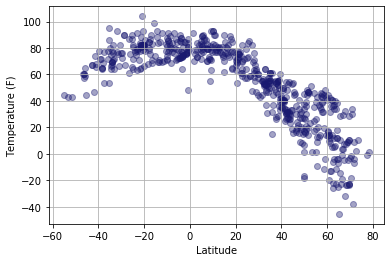

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="o", alpha="0.40", color="midnightblue")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#plt.tittle("City Latitude vs Max Temperature")
plt.grid()
plt.savefig('../output_data/Scatter1.png')
plt.scatter

#### Latitude vs. Temperature Plot

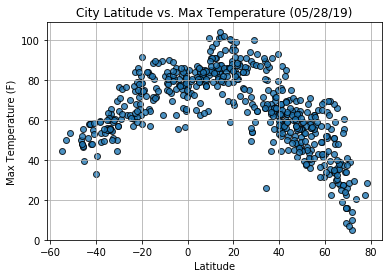

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

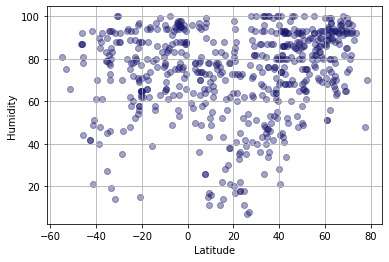

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", alpha="0.40", color="midnightblue")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
#plt.tittle("City Latitude vs Max Temperature")
plt.grid()
plt.savefig('../output_data/Scatter2.png')
plt.scatter

#### Latitude vs. Humidity Plot

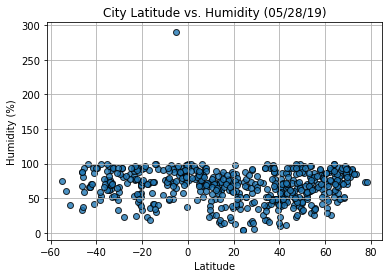

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

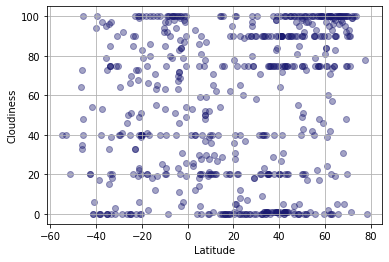

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", alpha="0.40", color="midnightblue")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
#plt.tittle("City Latitude vs Max Temperature")
plt.grid()
plt.savefig('../output_data/Scatter3.png')
plt.scatter

#### Latitude vs. Cloudiness Plot

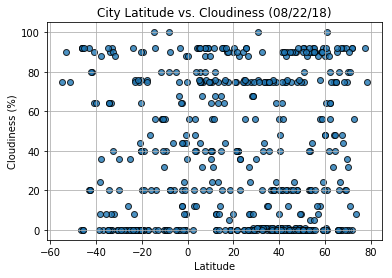

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

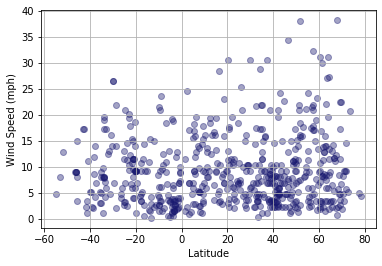

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", alpha="0.40", color="midnightblue")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plt.tittle("City Latitude vs Max Temperature")
plt.grid()
plt.savefig('../output_data/Scatter4.png')
plt.scatter

#### Latitude vs. Wind Speed Plot

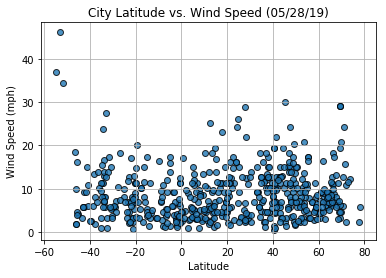

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
from scipy import stats
x_values = weather_data['Lat']
y_values = weather_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)



0      83.583968
1      51.905980
2      59.040851
3      42.713645
4      42.532309
         ...    
584    59.780143
585    31.673078
586    24.712569
587    56.711382
588    34.992920
Name: Lat, Length: 589, dtype: float64


In [24]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.7x +67.45


The r-squared is: -0.7781133340508838


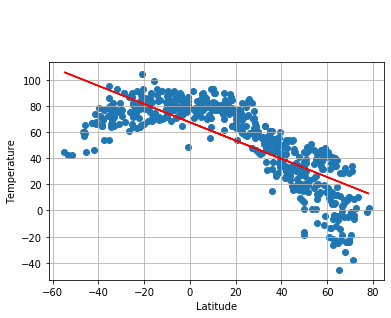

In [25]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,150),fontsize=10,color="red")
plt.grid(True)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


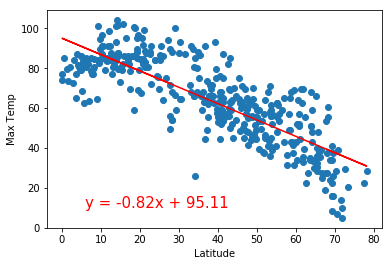

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


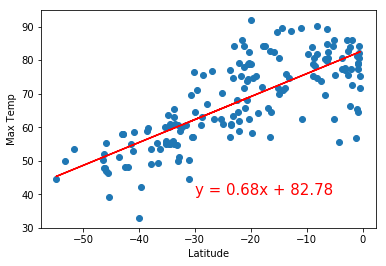

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


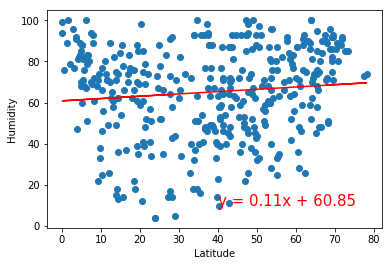

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


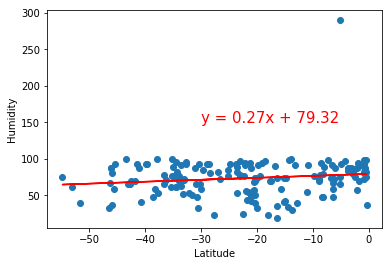

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


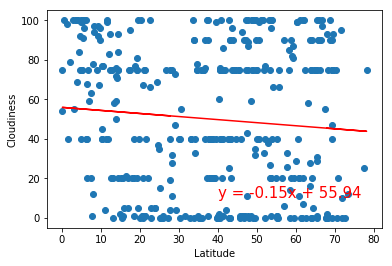

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


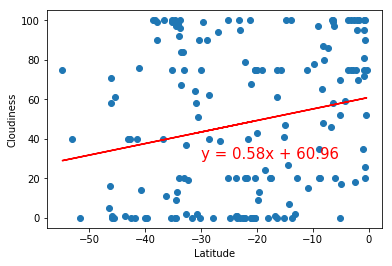

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


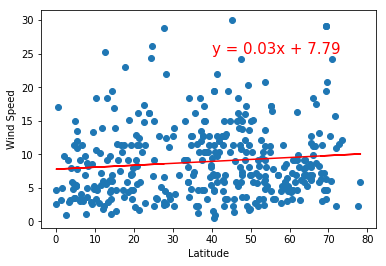

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


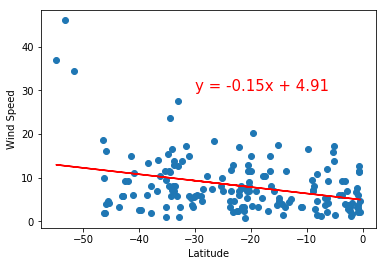